In [2]:
import requests 
import pandas 
from datetime import date
from datetime import timedelta
pandas.options.display.float_format = '{:.2f}'.format

# Dans le fichier le nombre afficher à chque jour est le nouveau nombre de cas (ou de décès) par région 
# À partir du 22 janvier 2020 

#Lien pour les CAS https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

#Lien pour les DÉCÈS https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

#Lien pour les rétablisssements https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv

In [3]:
#Variable pour avoir automatiquement la dernière colonne du tableau soit la dernière journée. 
today = date.today()
hier = today - timedelta (days = 1)
hier = hier.strftime("%#m/%#d/%y")



In [4]:
#Importer le fichier (NB DE DÉCÈS)
fichier_cas = pandas.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv', delimiter=',')
#Remplacer certains noms pour faire le bon joint avec l'autre fichier plus tard 
fichier_cas_RR = fichier_cas.replace("US","United States").replace("Iran","Iran, Islamic Rep.")


#Faire la somme de cas par pays (et non pas par région)
fichier_cas_RR_grouper = fichier_cas_RR.groupby(["Country/Region"])[[hier]].sum()


#Faire le top 10 des cas par pays. 
fichier_cas_RR_grouper_trier = fichier_cas_RR_grouper.sort_values(by=[hier],ascending=False).head(10)
fichier_cas_RR_grouper_trier

fichier_cas_RR_grouper_trier

,4/6/20
Country/Region,
United States,366614
Spain,136675
Italy,132547
Germany,103374
France,98963
China,82665
"Iran, Islamic Rep.",60500
United Kingdom,52279
Turkey,30217


In [5]:
#Importer le fichier csv de la World Bank. 
Pop = pandas.read_csv("Data_Pop.csv",delimiter=',', skiprows=4)
#error_bad_lines= False)
Pop

#GDP_trier = GDP.sort_values(by=["2019"],ascending=False).head(10)
#Faire le joint entre
Data_full = fichier_cas_RR_grouper.join(Pop.set_index("Country Name"), on="Country/Region")

Data_full_trier_Pop = Data_full.sort_values(by=[hier],ascending=False).head(10)
Data_full_trier_Pop





,4/6/20,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
Country/Region,,,,,,,,,,,,,,,,,,,,,
United States,366614,USA,Population density (people per sq. km of land ...,EN.POP.DNST,nan,20.06,20.37,20.66,20.95,21.21,...,34.06,34.31,34.55,34.81,35.06,35.32,35.55,35.77,nan,nan
Spain,136675,ESP,Population density (people per sq. km of land ...,EN.POP.DNST,nan,61.51,62.07,62.62,63.25,63.94,...,93.51,93.51,93.20,92.92,92.95,93.05,93.27,93.53,nan,nan
Italy,132547,ITA,Population density (people per sq. km of land ...,EN.POP.DNST,nan,171.83,172.99,174.26,175.70,177.19,...,201.87,202.42,204.78,206.67,206.47,206.12,205.81,205.45,nan,nan
Germany,103374,DEU,Population density (people per sq. km of land ...,EN.POP.DNST,nan,210.17,212.03,214.00,215.73,217.58,...,230.30,230.75,231.16,232.11,234.15,235.71,236.60,237.37,nan,nan
France,98963,FRA,Population density (people per sq. km of land ...,EN.POP.DNST,nan,86.27,87.49,88.72,89.91,90.98,...,119.34,119.91,120.53,121.11,121.62,122.11,122.12,122.34,nan,nan
China,82665,CHN,Population density (people per sq. km of land ...,EN.POP.DNST,nan,70.34,70.92,72.68,74.39,76.18,...,143.17,143.87,144.58,145.32,146.06,146.85,147.67,148.35,nan,nan
"Iran, Islamic Rep.",60500,IRN,Population density (people per sq. km of land ...,EN.POP.DNST,nan,13.80,14.16,14.54,14.92,15.32,...,45.82,46.38,46.96,47.56,48.19,48.85,49.53,50.22,nan,nan
United Kingdom,52279,GBR,Population density (people per sq. km of land ...,EN.POP.DNST,nan,218.24,220.10,221.76,223.21,224.64,...,261.48,263.30,265.07,267.07,269.21,271.13,273.05,274.83,nan,nan
Turkey,30217,TUR,Population density (people per sq. km of land ...,EN.POP.DNST,nan,36.57,37.46,38.37,39.30,40.24,...,95.43,97.00,98.66,100.35,102.04,103.71,105.38,106.96,nan,nan


Text(0, 0.5, 'Habitants/km2')

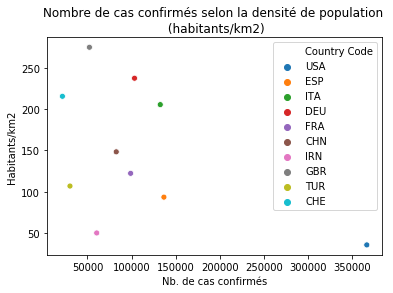

In [6]:
#Faire le graphique 
import seaborn 
import matplotlib.pyplot
# Y = 2018 car c'est l'année la plus récente où nous avons le PIB de chaque pays du top 10. 
seaborn.scatterplot(x=hier, y='2018', hue='Country Code', data= Data_full_trier_Pop)
matplotlib.pyplot.title("Nombre de cas confirmés selon la densité de population \n (habitants/km2)")
matplotlib.pyplot.xlabel("Nb. de cas confirmés")
matplotlib.pyplot.ylabel("Habitants/km2")